In [2]:
import glob
import networkx as nx
import matplotlib.pyplot as plt
from Functions.class_TM import TM

In [3]:
characters = {}
for file in glob.glob('Data\*.csv'):
    cb = TM()
    cb.unpack(file)
    for row in cb.data.iterrows():
        for character in row[1]:
            if character == '':
                break
            if character in characters:
                characters[character] += 1
            else:
                characters[character] = 1

characters = dict(sorted(characters.items(), key = lambda x: x[1], reverse = True))

In [4]:
edges, weights = [], []
for file in glob.glob('Data\*.csv'):
    cb = TM()
    cb.unpack(file)
    for row in cb.data.iterrows():
        for i in range(len(row[1])):
            if row[1][i] == '':
                break
            for j in range(i + 1, len(row[1])):
                if row[1][j] == '':
                    break
                if [row[1][i], row[1][j]] in edges:
                    index = edges.index([row[1][i], row[1][j]])
                    weights[index] += 1
                elif [row[1][j], row[1][i]] in edges:
                    index = edges.index([row[1][j], row[1][i]])
                    weights[index] += 1
                else:
                    edges.append([row[1][i], row[1][j]])
                    weights.append(1)
                    
for i in range(len(edges)):
    edges[i].append({'weight' : weights[i]})
    edges[i] = tuple(edges[i])

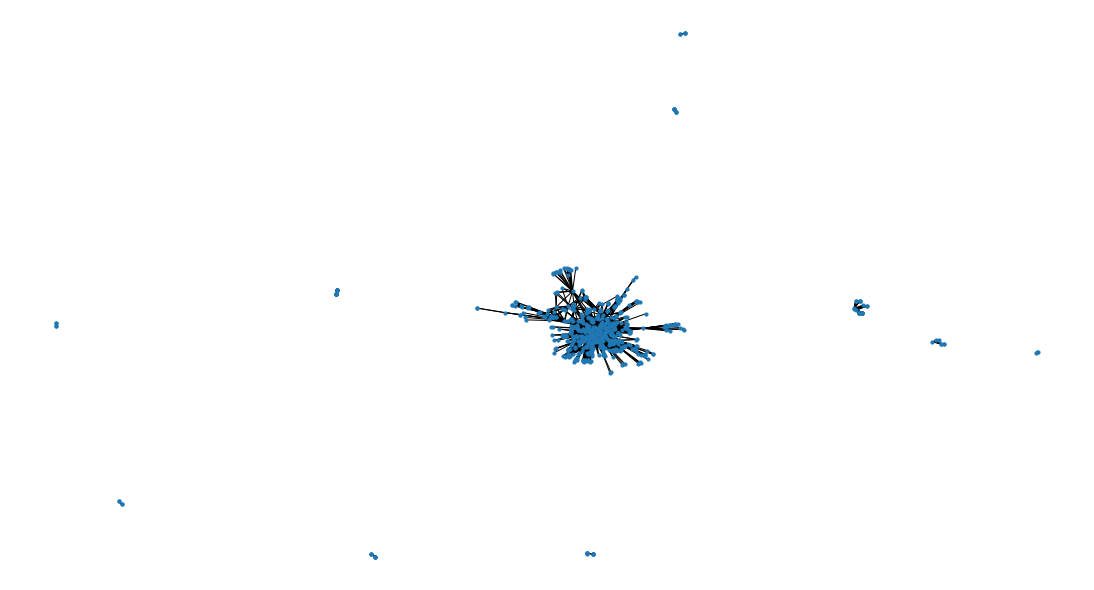

In [5]:
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, k = 0.01)
plt.figure(figsize = (15, 8))
nx.draw(G, pos = pos, node_size = 10)

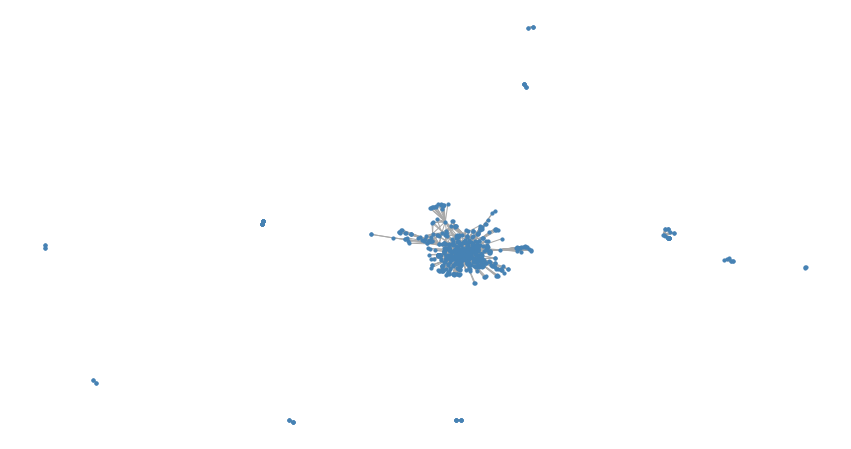

In [6]:
graph_edges = G.edges()
degrees = dict(nx.degree(G))
plt.figure(figsize = (15, 8))

nx.draw_networkx_edges(G,
                       pos = pos,
                       edgelist = graph_edges,
                       width = [G[u][v]['weight'] / 50 for u, v in graph_edges],
                       edge_color = 'darkgray')
nx.draw(G,
        pos = pos,
        node_size = 10,
        edge_color = 'darkgray',
        node_color = 'steelblue')

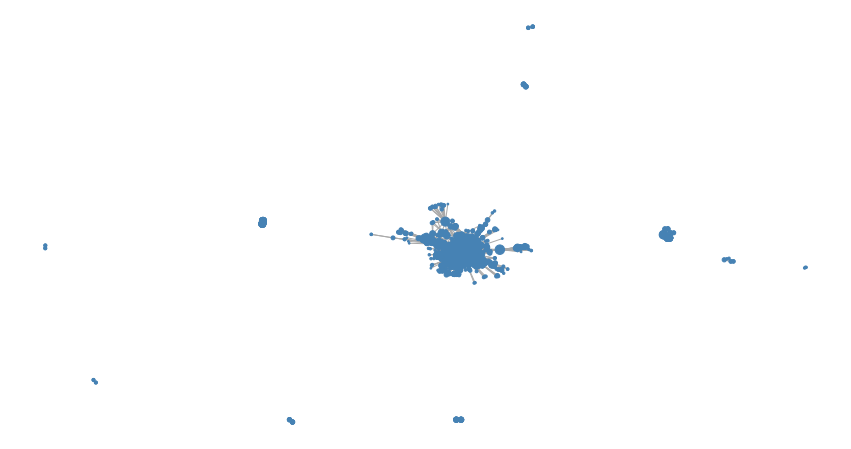

In [7]:
graph_edges = G.edges()
degrees = dict(nx.degree(G))
plt.figure(figsize = (15, 8))

nx.draw_networkx_edges(G,
                       pos = pos,
                       edgelist = graph_edges,
                       width = [G[u][v]['weight'] / 50 for u, v in graph_edges],
                       edge_color = 'darkgray')
nx.draw(G,
        pos = pos,
        node_size = [v * 3 for v in degrees.values()],
        edge_color = 'darkgray',
        node_color = 'steelblue')

plt.savefig('..\TeX\img\graph.png')

In [8]:
len(G.nodes())

658

In [9]:
len(G.edges())

3840

In [11]:
list(nx.connected_components(G))

[{'Alice',
  'Alien 1',
  'Alien 2',
  'Alien 3',
  'Alien Tomboniano 1',
  'Alien Tomboniano 2',
  'Alien Tomboniano 3',
  'Alien Tomboniano 4',
  'Alien Tomboniano 5',
  'Alienígenas',
  'Alminha',
  'Anjinho',
  'Anjinho 2',
  'Anjinho 3',
  'Anjinho 4',
  'Anjinho 5',
  'Anjo 1',
  'Anjo 2',
  'Anjo 3',
  'Anjo da Guarda da Magali',
  'Anão 1',
  'Anão 2',
  'Arkanum',
  'Arqueiro Anão 1',
  'Arqueiro Anão 2',
  'Arqueiro Anão 3',
  'Arqueiro Anão 4',
  'Astrogildo',
  'Astronauta',
  'Astronauta do Futuro',
  'Atendente 1 - gibi 1',
  'Atendente 1 - gibi 3',
  'Atendente 1 - gibi 4',
  'Atendente 1 - gibi 5',
  'Atendente 1 - gibi 6',
  'Atendente 2 - gibi 1',
  'Atendente 2 - gibi 3',
  'Atendente 2 - gibi 4',
  'Atendente 2 - gibi 5',
  'Atendente 3 - gibi 1',
  'Atendente 3 - gibi 3',
  'Atendente 3 - gibi 4',
  'Atendente 4 - gibi 1',
  'Atendente 4 - gibi 3',
  'Atendente 4 - gibi 4',
  'Atendente 5 - gibi 4',
  'Aveia',
  'Banda',
  'Bebê',
  'Bidu',
  'Bloguinho',
  'Bodes'